In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd 
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path+'king.csv', index_col=0)

In [33]:
df.info()

<class 'pandas.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  str    
 1   zipcode        21613 non-null  int64  
 2   lat            21613 non-null  float64
 3   long           21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_above     21613 non-null  int64  
 7   sqft_basement  21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  price          21613 non-null  int64  
dtypes: float64(4), int64(10), str(1)
memory usage: 2.6 MB


In [34]:
df.head()

,date,zipcode,lat,long,bedrooms,bathrooms,sqft_above,sqft_basement,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,price
id,,,,,,,,,,,,,,,
7129300520,20141013T000000,98178,47.5112,-122.257,3,1.00,1180,0,5650,1.0,0,3,1955,0,221900
6414100192,20141209T000000,98125,47.7210,-122.319,3,2.25,2170,400,7242,2.0,0,3,1951,1991,538000
5631500400,20150225T000000,98028,47.7379,-122.233,2,1.00,770,0,10000,1.0,0,3,1933,0,180000
2487200875,20141209T000000,98136,47.5208,-122.393,4,3.00,1050,910,5000,1.0,0,5,1965,0,604000
1954400510,20150218T000000,98074,47.6168,-122.045,3,2.00,1680,0,8080,1.0,0,3,1987,0,510000


In [35]:
df['price'] = df['price']/1000

In [36]:
df['price'].describe()

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

Text(0.5, 0, 'Sale price (thousands)')

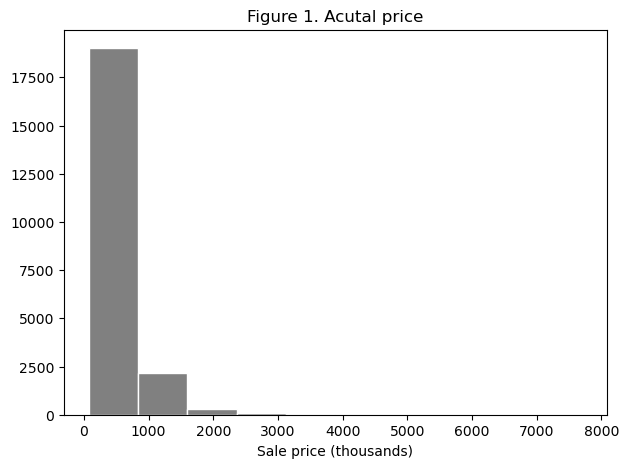

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
plt.title('Figure 1. Acutal price')
plt.hist(df['price'], color = 'gray', edgecolor = 'white')
plt.xlabel('Sale price (thousands)')

In [38]:
y=df['price']
X=df.drop(columns = ['price', 'zipcode', 'date'])

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [40]:
lin_reg.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [41]:
y_pred = lin_reg.predict(X)

In [42]:
round(lin_reg.score(X,y),3)

0.646

Text(0, 0.5, 'Actual price (thousands)')

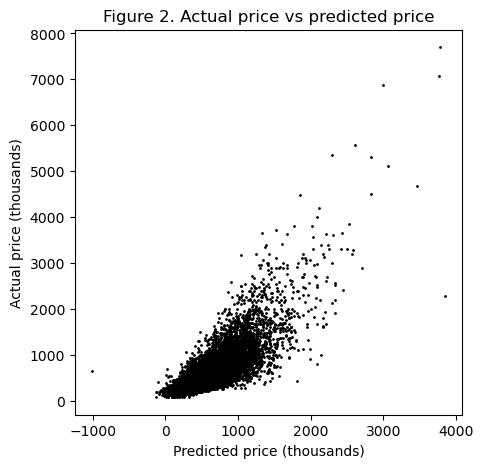

In [43]:
plt.figure(figsize=(5,5))
plt.title('Figure 2. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)')

In [44]:
(y_pred < 0).sum()

np.int64(38)

In [45]:
X1= df.drop(columns  = ['date', 'zipcode', 'lat', 'long', 'price'])

In [46]:
X2 = pd.get_dummies(df['zipcode'])
X= pd.concat([X1,X2], axis=1)

In [47]:
X.shape

(21613, 80)

In [48]:
X = X.values

In [49]:
lin_reg.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [50]:
y_pred = lin_reg.predict(X)

In [51]:
round(lin_reg.score(X,y),3)

0.785

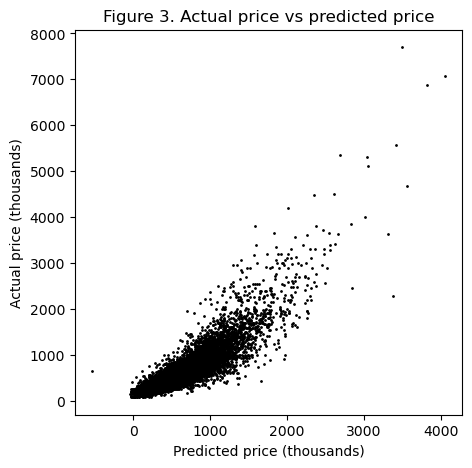

In [52]:
plt.figure(figsize=(5,5))
plt.title('Figure 3. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)');

In [53]:
(y_pred < 0).sum()

np.int64(16)

In [54]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 6)
tree_reg.fit(X,y)
round(tree_reg.score(X,y),3)

0.658

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth = 6, n_estimators=100)
rf_reg.fit(X,y)
round(rf_reg.score(X,y),3)


0.7

In [56]:
from xgboost import XGBRegressor 
xgb_reg = XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 6)
xgb_reg.fit(X,y)
round(xgb_reg.score(X,y),3)

0.885

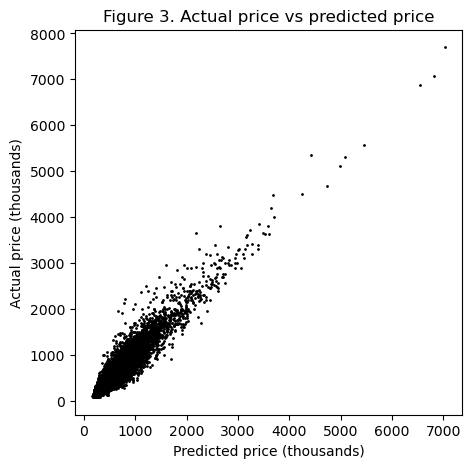

In [57]:
y_pred = xgb_reg.predict(X)
plt.figure(figsize=(5,5))
plt.title('Figure 3. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)');

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [59]:
lin_reg.fit(X_train, y_train)
round(lin_reg.score(X_train, y_train),3), round(lin_reg.score(X_test, y_test),3)

(0.787, 0.78)

In [60]:
xgb_reg.fit(X_train, y_train)
round(xgb_reg.score(X_train, y_train),3), round(xgb_reg.score(X_test, y_test),3)

(0.89, 0.799)